# アジェンダ

## 確認テスト
```
ディープラーニングは、結局何をやろうとしているか2行以内で述べよ。  
また、次の中のどの値の最適化が最終目的か。全て選べ。  
①入力値[ X] ②出力値[ Y]③重み[W]④バイアス[b]⑤総入力[u] ⑥中間層入力[ z]⑦学習率[ρ]
```  

人間が自然に行うタスク(音声の認識、画像の特定、予測など)をコンピュータに学習させ、自動化すること。  
最適化は③重み、④バイアス、⑦学習率に対して行う。

## 確認テスト
```
次のネットワークを紙にかけ。  
入力層︓2ノード1層中間層︓３ノード2層出力層︓1ノード1層
```
![day1_1.jpg](resource/day1_1.jpg)

# Section1: 入力層〜中間層

入力層はデータの入力が行われる。データは事前に数値化が必要。  
中間層は入力層と出力層の中間にあり、その構成を変えることで複雑な問題を表現できるポテンシャルがある。  
しかし段数を増やすと誤差逆伝播時に勾配消失の問題が出てくる。

## 確認テスト
```
この図式に動物分類の実例を入れてみよう。
```
![day1_2.jpg](resource/day1_2.jpg)

## 確認テスト
```
この数式をPythonで書け。
```
```
u = np.dot(x, W) + b
```
## 確認テスト
```
1-1のファイルから中間層の出力を定義しているソースを抜き出せ。
```
```  
z = functions.relu(u)
```

# Section2: 活性化関数

単純パーセプトロン問題では出力層にのみ活性化関数を使用していた。  
多層ニューラルネットワークでは中間層にも活性化関数を使うのが有効である。そうすることで非線形問題を表現可能になる。  
中間層でよく使われる活性化関数はReLU関数、シグモイド関数、ステップ関数

## 確認テスト
```
線形と非線形の違いを図にかいて簡易に説明せよ。
```
![day1_3.jpg](resource/day1_3.jpg)
```
## 確認テスト
```
配布されたソースコードより該当する箇所を抜き出せ。
```
```
z = functions.sigmoid(u)
```


# Section3: 出力層

## 誤差関数

二乗和誤差が有名、クラス分類ではクロスエントロピー誤差を使う。

## 出力層の活性化関数

分類問題の場合出力の総和を1にする必要があり、ソフトマックス関数を使う

### 確認テスト
```
・なぜ、引き算でなく二乗するか述べよ  
・下式の1/2はどういう意味を持つか述べよ
```
 引き算の場合、正の差分と負の差分とで打ち消し合ってしまうため  
 微分したとき出てくる2を消す

### 確認テスト
```
①~③の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。
```
```
def softmax(x):
    if x.ndim == 2: // xが2次元の場合
        x = x.T // xを転置
        x = x - np.max(x, axis=0) // 各成分から最大値を引き算
        y = np.exp(x) / np.sum(np.exp(x), axis=0) // 計算
        return y.T //　転置したものを返す

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x)) // 計算

```
### 確認テスト
```
①~②の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。
```
```
def cross_entropy_error(d, y):
    if y.ndim == 1: // yが1次元の場合
        d = d.reshape(1, d.size) // 1×dの形に整形
        y = y.reshape(1, y.size) // 1×yの形に整形
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size: // dとyのサイズが等しい場合
        d = d.argmax(axis=1) // dにaxis=1の方向の最大値を設定
             
    batch_size = y.shape[0] //バッチサイズとしてy.shape[0]を設定
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size // 計算
```

# Section4: 勾配降下法

誤差関数を最小化するのに使用するアルゴリズム。  
重みと誤差関数を重みで微分して得られる$\nabla E$を用いて重みを更新していく。  
学習率を大きくしすぎると収束しないので調整が必要。

## 確認テスト
```
該当するソースコードを探してみよう。
```
```
network[key]  -= learning_rate * grad[key]
```
## 確認テスト
```
オンライン学習とは何か2行でまとめよ
```
バッチ単位ではなくデータ1件ごとに重みを更新していく学習  
変化に迅速に対応できるのと学習済データを蓄えておかなくていいメリットがある
## 確認テスト
```
・この数式の意味を図に書いて説明せよ。
```
誤差関数が最小となるように重みをミニバッチ単位で更新していく  
![day1_4.jpg](resource/day1_4.jpg)


# Section5: 誤差逆伝搬法

複雑の誤差関数の偏微分をコンピュータで有効的に計算しやすくするアルゴリズム。  
出力層に近い層から順に重みの微分を求めていくので、そのフローから逆伝搬と呼ばれる。  
層が増えると途中で勾配消失してしまう問題がある。

## 確認テスト
```
誤差逆伝播法では不要な再帰的処理を避ける事が出来る。  
既に行った計算結果を保持しているソースコードを抽出せよ。
```
```
delta2 = functions.d_sigmoid_with_loss(d, y)
delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
```
## 確認テスト
```
2つの空欄に該当するソースコードを探せ
```
```
delta2 = functions.d_mean_squared_error(d, y)  
grad['W2'] = np.dot(z1.T, delta2)
```

# 実装演習結果キャプチャー

https://github.com/syoshinaga/rabbit_challenge/tree/main/capture/day1/1_1_forward_propagation.ipynb
https://github.com/syoshinaga/rabbit_challenge/tree/main/capture/day1/1_1_forward_propagation_after.ipynb
https://github.com/syoshinaga/rabbit_challenge/tree/main/capture/day1/1_2_back_propagation.ipynb
https://github.com/syoshinaga/rabbit_challenge/tree/main/capture/day1/1_3_stochastic_gradient_descent.ipynb
https://github.com/syoshinaga/rabbit_challenge/tree/main/capture/day1/1_4_1_mnist_sample.ipynb


# リンク

本記事は以下のオンライン講座のレポートとして作成したものです。

3カ月で現場で潰しが効くディープラーニング講座

https://study-ai.com/jdla/

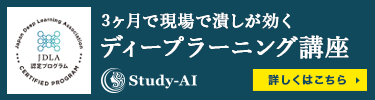